## WeatherPy

### Analysis

As suspected, the weather becomes warmer the closer you get to the equator (0 degrees latitude). There are some spikes in temperature between 20 degrees and 40 degrees latitude.

Neither humiditiy, cloudiness nor wind speed have direct relationships with the latitude. This applies to both the Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude).

There is a negative correlation between temperature and latitude. The further away from the equator (0 degrees latitude), the lower the temperature.

There is a positive correlation between latitude and max temperature. The closer you get to the equator (0 degrees latitude), the higher the temperature.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

621

## Perform API Calls

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | san luis
Processing Record 3 of Set 1 | baruun-urt
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | valley
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | basoko
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ahipara
Processing Record 16 of Set 1 | arlit
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | ambon
Processing Record 20 of Set 1 | nanchang
Processing Record 21 of Set 1 | bud
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | vieste
Processing Recor

Processing Record 41 of Set 4 | lakhimpur
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | ust-kulom
Processing Record 44 of Set 4 | andrews
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | tukrah
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | hofn
Processing Record 0 of Set 5 | mago
Processing Record 1 of Set 5 | nayudupeta
Processing Record 2 of Set 5 | bereda
Processing Record 3 of Set 5 | wagga wagga
Processing Record 4 of Set 5 | gamba
Processing Record 5 of Set 5 | sabang
Processing Record 6 of Set 5 | glasgow
Processing Record 7 of Set 5 | namibe
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | otradnoye
Processing Record 10 of Set 5 | ust-ishim
Processing Record 11 of Set 5 | waitati
Processing Record 12 of Set 5 | port alfred
Processing Record 13 of Set 5 | marfino
Processing Record 14 of Set 5 | beidao
Processing Record 15 of Set 5 | olinda


Processing Record 29 of Set 8 | port-gentil
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | moose factory
Processing Record 32 of Set 8 | turochak
Processing Record 33 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 8 | saint-pierre
Processing Record 35 of Set 8 | cabo san lucas
Processing Record 36 of Set 8 | verkhnevilyuysk
Processing Record 37 of Set 8 | the valley
Processing Record 38 of Set 8 | erdenet
Processing Record 39 of Set 8 | khatanga
Processing Record 40 of Set 8 | pancas
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | state college
Processing Record 43 of Set 8 | harigue
City not found. Skipping...
Processing Record 44 of Set 8 | yekaterinovka
Processing Record 45 of Set 8 | sterling
Processing Record 46 of Set 8 | vestmannaeyjar
Processing Record 47 of Set 8 | caluquembe
Processing Record 48 of Set 8 | vanimo
Processing Record 49 of Set 8 | rosarito
Processing Record 0 of Set 9 | bjornevat

Processing Record 15 of Set 12 | primore
City not found. Skipping...
Processing Record 16 of Set 12 | ilinogorsk
City not found. Skipping...
Processing Record 17 of Set 12 | jackson
Processing Record 18 of Set 12 | kaseda
Processing Record 19 of Set 12 | uglegorsk
Processing Record 20 of Set 12 | mjolby
Processing Record 21 of Set 12 | sokol
Processing Record 22 of Set 12 | duluth
Processing Record 23 of Set 12 | mazagao
Processing Record 24 of Set 12 | shelburne
Processing Record 25 of Set 12 | malatya
Processing Record 26 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 27 of Set 12 | wonthaggi
Processing Record 28 of Set 12 | sokoni
Processing Record 29 of Set 12 | timbiras
Processing Record 30 of Set 12 | davila
Processing Record 31 of Set 12 | kholodnyy
Processing Record 32 of Set 12 | vanavara
Processing Record 33 of Set 12 | omsukchan
Processing Record 34 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 35 of Set 12 | skelleftea
Processing

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display the City Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,32.00,86,28,4.70,AR,1595375972
1,san luis,-33.30,-66.34,46.35,88,98,8.88,AR,1595375972
2,baruun-urt,46.68,113.28,73.00,51,0,8.61,MN,1595375973
3,fortuna,40.60,-124.16,63.00,87,90,12.75,US,1595375814
4,tuktoyaktuk,69.45,-133.04,42.80,81,90,5.82,CA,1595375973


In [9]:
# Check data stats
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,5.680000e+02
mean,21.209736,15.803926,69.00706,71.406690,52.600352,7.378944,1.595376e+09
std,33.205314,92.097590,13.12304,19.421667,37.828730,4.981130,6.561170e+01
min,-54.800000,-179.170000,23.00000,3.000000,0.000000,0.270000,1.595376e+09
25%,-5.577500,-67.297500,59.00000,61.000000,14.000000,3.485000,1.595376e+09
50%,27.965000,20.405000,71.11500,75.000000,58.500000,6.600000,1.595376e+09
75%,49.110000,99.042500,78.80000,87.000000,90.000000,9.805000,1.595376e+09
max,78.220000,179.320000,100.40000,100.000000,100.000000,26.840000,1.595376e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_df[(city_data_df["Humidity"] > 100)].index

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,32.00,86,28,4.70,AR,1595375972
1,san luis,-33.30,-66.34,46.35,88,98,8.88,AR,1595375972
2,baruun-urt,46.68,113.28,73.00,51,0,8.61,MN,1595375973
3,fortuna,40.60,-124.16,63.00,87,90,12.75,US,1595375814
4,tuktoyaktuk,69.45,-133.04,42.80,81,90,5.82,CA,1595375973


In [12]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs Temperature Plot

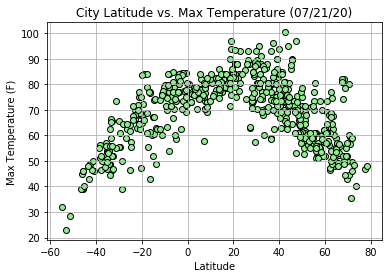

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### The weather becomes warmer the closer you get to the equator (0 degrees latitude). There are some spikes in temperature between 20 degrees and 40 degrees latitude.

## Latitude vs Humidity Plot

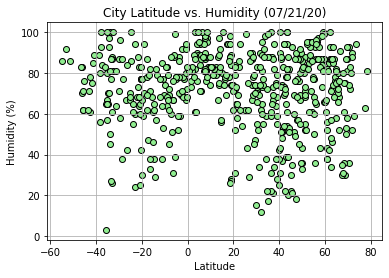

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude and humiditiy have no direct relationship.

## Latitude vs Cloudiness Plot

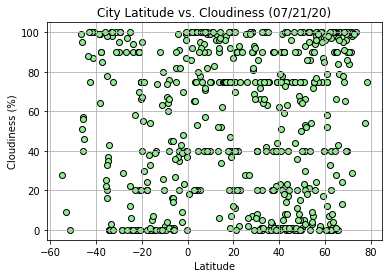

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude and cloudiness have no direct relationship.

## Latitude vs Wind Speed Plot

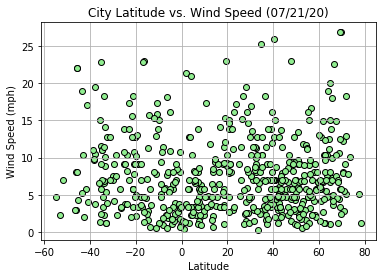

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

### Latitude and wind speed have no direct relationship.

## Linear Regression

In [17]:
# y = mx + b  (b = intercept, m = slope, x,y remain the same)
# r squared values range from 0 to 1 or 0% to 100%; the higher the r squared, the better the models fits the data

# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Max Temperature vs Latitude Linear Regression

The r-squared is: 0.4388022584157003


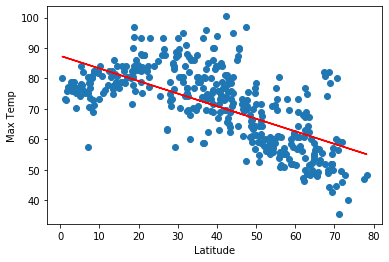

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

### In the Northern Hemisphere there is a negative correlation between temperature and latitude. The further away from the equator (0 degrees latitude), the lower the temperature.

The r-squared is: 0.6578315003970061


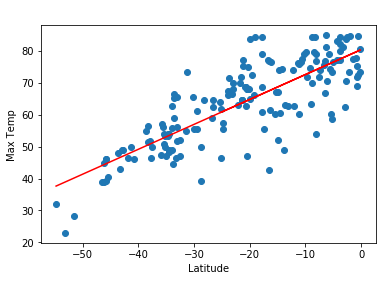

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

### In the Southern Hemisphere there is a positive correlation between latitude and max temperature. The closer you get to the equator (0 degrees latitude), the higher the temperature.

## Humidity vs Latitude Linear Regression

The r-squared is: 0.02543204400729095


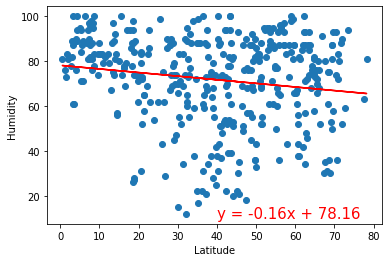

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

### In the Northern Hemisphere there is no correlation between humidity and latitude.

The r-squared is: 0.005430323167917381


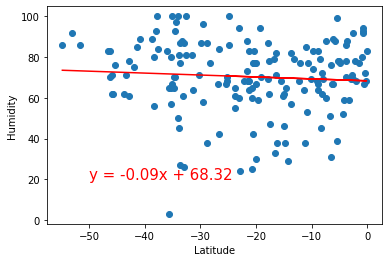

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

### In the Southern Hemisphere there is no correlation between humidity and latitude.

## Cloudiness (%) vs Latitude Linear Regression

The r-squared is: 0.005415607030274663


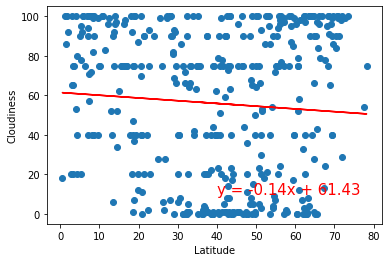

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

### In the Northern Hemisphere there is no correlation between cloudiness and latitude.

The r-squared is: 0.024475263936581143


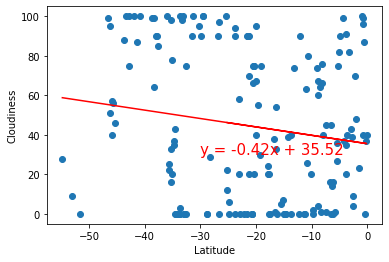

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

### In the Southern Hemisphere there is no correlation between cloudiness and latitude.

## Wind Speed (mph) vs Latitude Linear Regression

The r-squared is: 0.007554078918630498


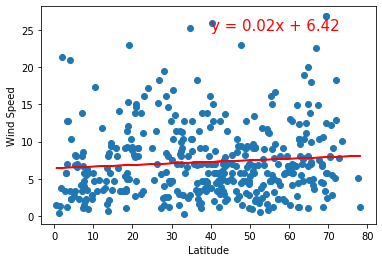

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

### In the Northern Hemisphere there is no correlation between windspeed and latitude.

The r-squared is: 0.035582568824723215


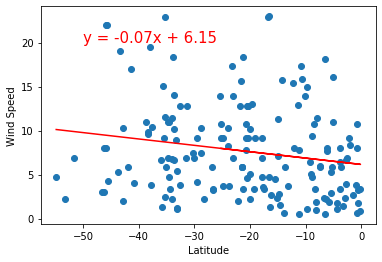

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

### In the Souththern Hemisphere there is no correlation between wind speed and latitude.